# Visualizing Networks

#Cora dataset:

The Cora dataset is a widely used benchmark dataset in the field of graph-based machine learning, particularly for tasks like node classification on citation networks.

Here are the key characteristics of the Cora dataset:

1. **Content**: It consists of a collection of
scientific publications (papers).
2. **Size**: There are 2708 scientific publications in the dataset.
3. **Classification**: Each publication is categorized into one of seven different classes. These classes typically represent academic subject areas or research topics.
4. **Citation Network**: The dataset includes a citation network, representing which papers cite which other papers. This network contains 5429 links (citations) between the publications.
5. **Paper Representation**: Each paper is described by a binary word vector (0/1-valued). This vector indicates the presence (1) or absence (0) of a specific word from a dictionary of words relevant to the dataset. This serves as a feature representation for each paper, capturing its content based on keywords.

In essence, the Cora dataset provides a network where nodes are papers, edges are citations, and each node has features (word vectors) and a label (subject class). This structure makes it suitable for tasks where you want to predict the class of a paper based on its content and its position within the citation network.

In [ ]:
import pandas as pd
import networkx as nx
import numpy as np

# Load the edge list from the cora.cites file.
# The file is tab-separated and has no header.
# We name the columns 'target' and 'source' to represent citations.
edges = pd.read_csv("cora.cites", sep='\t', header=None, names=['target', 'source'])

#Load the node content from the cora.content file.
# This file is also tab-separated and has no header.
# The first column is the node ID, the middle columns are features, and the last is the label.
nodes = pd.read_csv("cora.content", sep='\t', header=None)

# Convert node IDs in both DataFrames to strings for consistency.
# This prevents potential issues when using them as graph node identifiers.
edges['source'] = edges['source'].astype(str)
edges['target'] = edges['target'].astype(str)
nodes[0] = nodes[0].astype(str) # Column 0 contains the node IDs in the nodes DataFrame


# Create a directed graph (DiGraph) from the edges DataFrame.
# The 'source' column indicates the citing paper, and the 'target' column is the cited paper.
G = nx.from_pandas_edgelist(edges, source='source', target='target', create_using=nx.DiGraph())

# Add node features and labels
# Iterate through each row in the nodes DataFrame.
for _, row in nodes.iterrows():
    # Get the node ID (first column).
    node_id = row[0]
    # Extract the feature vector (all columns except the first and last).
    features = np.array(row[1:-1], dtype=int)
    # Get the class label (last column).
    label = row.iloc[-1]

    # Check if the node ID exists in the graph (some nodes in cora.content might not be in cora.cites).
    if node_id in G:
        # Add the 'feature' and 'label' as attributes to the node in the graph.
        G.nodes[node_id]['feature'] = features
        G.nodes[node_id]['label'] = label

# Safely get a sample node with attributes
for node in G.nodes:
    if 'feature' in G.nodes[node] and 'label' in G.nodes[node]:
        sample_node = node
        break

# Print attributes
print("Sample node ID:", sample_node)
print("Feature vector (first 10 features):", G.nodes[sample_node]['feature'][:10])
print("Label:", G.nodes[sample_node]['label'])


Sample node ID: 1033
Feature vector (first 10 features): [0 0 0 0 0 0 0 0 0 1]
Label: Genetic_Algorithms


In [ ]:
# Display the first 5 rows of the edges DataFrame
print("First 5 rows of cora.cites:")
display(edges.head())

# Display the first 5 rows of the nodes DataFrame
print("\nFirst 5 rows of cora.content:")

First 5 rows of cora.cites:


,target,source
0,35,1033
1,35,103482
2,35,103515
3,35,1050679
4,35,1103960



First 5 rows of cora.content:


More about dataset: https://graphsandnetworks.com/the-cora-dataset/

In [ ]:
# read in the graph


In [ ]:
# See what layouts are available in networkX
[x for x in nx.__dir__() if x.endswith('_layout')]

['bipartite_layout',
 'circular_layout',
 'forceatlas2_layout',
 'kamada_kawai_layout',
 'random_layout',
 'rescale_layout',
 'shell_layout',
 'spring_layout',
 'spectral_layout',
 'planar_layout',
 'fruchterman_reingold_layout',
 'spiral_layout',
 'multipartite_layout',
 'bfs_layout',
 'arf_layout']

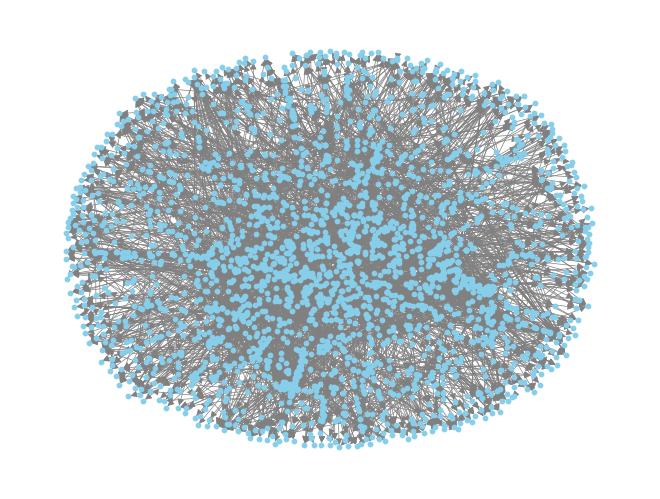

In [ ]:
#draw the graph using the default spring layout

import matplotlib.pyplot as plt

# Draw the graph with the default spring layout
# The pos (position) dictionary is computed by the layout algorithm.
# The default spring_layout provides positions for all nodes.
pos = nx.spring_layout(G)

# Draw the nodes using the calculated positions.
# node_size and node_color are optional parameters for customization.
nx.draw(G, pos, with_labels=False, node_size=10, node_color='skyblue', edge_color='gray', width=0.5)

# Display the plot.
plt.show()

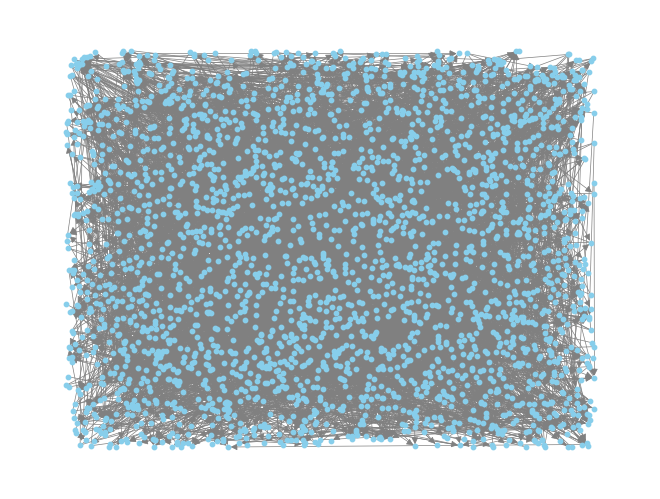

In [ ]:
# Draw the graph using the random layout

import matplotlib.pyplot as plt
# Draw the graph with the random layout
# The pos (position) dictionary is computed by the layout algorithm.
pos = nx.random_layout(G)

# Draw the nodes using the calculated positions.
nx.draw(G, pos, with_labels=False, node_size=10, node_color='skyblue', edge_color='gray', width=0.5)

# Display the plot.
plt.show()

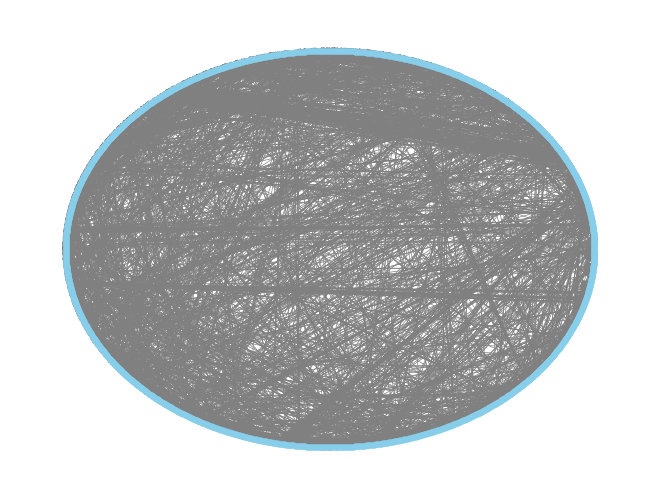

In [ ]:
# Draw the graph using the circular layout

import matplotlib.pyplot as plt
# Draw the graph using the circular layout
# The pos (position) dictionary is computed by the layout algorithm.
pos = nx.circular_layout(G)

# Draw the nodes using the calculated positions.
nx.draw(G, pos, with_labels=False, node_size=10, node_color='skyblue', edge_color='gray', width=0.5)

# Display the plot.
plt.show()

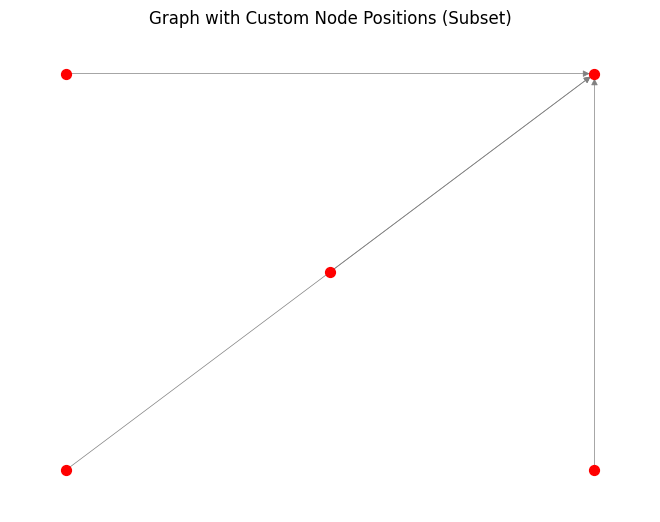

In [ ]:
#Draw nodes with custom node positions

import matplotlib.pyplot as plt
import numpy as np
import networkx as nx # Ensure networkx is imported

# Example: Create a dictionary of custom positions for a few nodes
custom_pos = {}
# Get some node IDs from the graph
sample_nodes = list(G.nodes())[:5] # Get the first 5 node IDs

# Assign arbitrary custom positions to these nodes
# Replace these with your actual desired positions if needed
custom_pos[sample_nodes[0]] = np.array([0, 0])
custom_pos[sample_nodes[1]] = np.array([1, 1])
custom_pos[sample_nodes[2]] = np.array([1, 0])
custom_pos[sample_nodes[3]] = np.array([0, 1])
custom_pos[sample_nodes[4]] = np.array([0.5, 0.5])

# To draw the whole graph with custom positions (if you had positions for all nodes):
# Ensure custom_pos has positions for all nodes in G
# Example: Using spring_layout as a base and modifying a few nodes
# pos = nx.spring_layout(G)
# pos.update(custom_pos) # Overwrite positions for nodes in custom_pos

# Or if you only want to draw a subset of nodes with custom positions:
# Create a subgraph containing only the nodes that are in custom_pos
nodes_to_draw = list(custom_pos.keys())
subgraph_to_draw = G.subgraph(nodes_to_draw)

# Draw the subgraph using the custom_pos for the nodes in the subgraph
nx.draw(subgraph_to_draw, pos=custom_pos, with_labels=False, node_size=50, node_color='red', edge_color='gray', width=0.5)
plt.title("Graph with Custom Node Positions (Subset)")
plt.show()

In [ ]:
# Homework: How can we assign custom node positions to some selected nodes and draw rest of the nodes using pre-defined layouts?

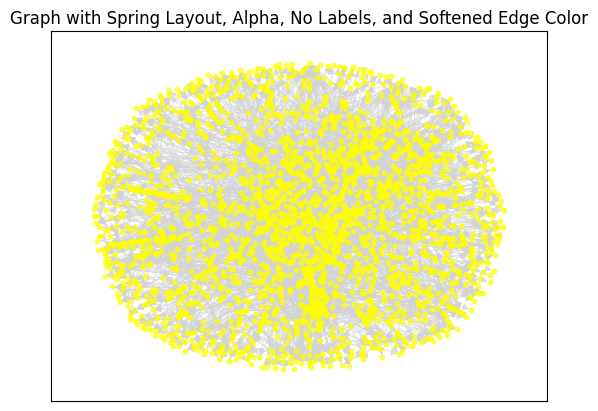

In [ ]:
# prompt: #Study the arguements of the draw_networkx function
# # https://networkx.org/documentation/stable/reference/generated/networkx.drawing.nx_pylab.draw_networkx.html#networkx.drawing.nx_pylab.draw_networkx
# # Draw the graph adding alpha, removing labels, and softening edge color

import matplotlib.pyplot as plt
# Recompute the spring layout for the entire graph
pos = nx.spring_layout(G)

# Draw the graph with specified parameters
nx.draw_networkx(
  G,
  pos,
  with_labels=False,  # Remove labels
  node_size=10,
  node_color='yellow',
  edge_color='lightgray',  # Soften edge color
  width=0.5,
  alpha=0.7  # Add transparency
)

# Display the plot
plt.title("Graph with Spring Layout, Alpha, No Labels, and Softened Edge Color")
plt.show()

<ipython-input-16-f5793c46e17a>:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', num_labels)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


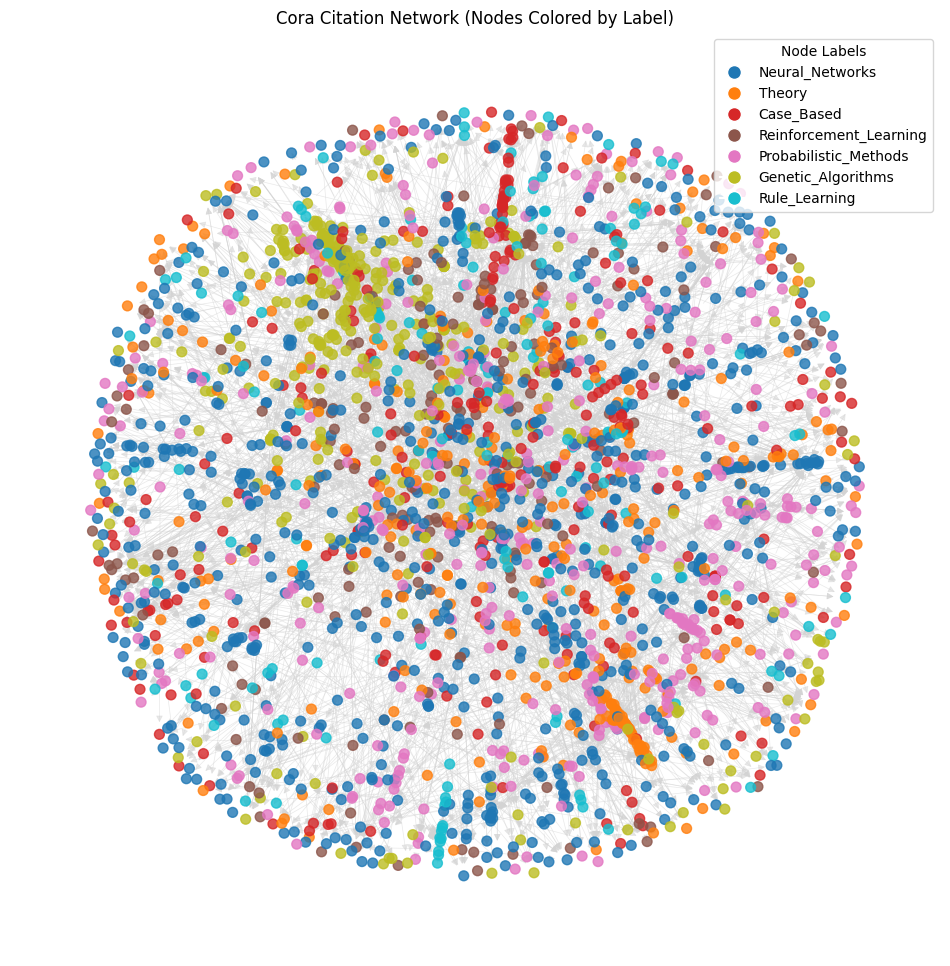

In [ ]:
# prompt: Draw the graph with node labels, different colors of nodes for different labels

import matplotlib.pyplot as plt
# Draw the graph with node labels and different colors based on labels
# First, get the unique labels
unique_labels = list(set(nx.get_node_attributes(G, 'label').values()))
num_labels = len(unique_labels)

# Create a color map
colors = plt.cm.get_cmap('tab10', num_labels)
label_to_color = {label: colors(i) for i, label in enumerate(unique_labels)}

# Create a list of node colors corresponding to each node's label
node_colors = [label_to_color.get(G.nodes[node].get('label'), 'gray') for node in G.nodes()] # Use gray for nodes without a label attribute

# Use a layout algorithm to compute node positions
pos = nx.spring_layout(G, seed=42) # Using seed for reproducibility

plt.figure(figsize=(12, 12))

# Draw the nodes with colors based on labels
# Use draw_networkx for more control, including node labels
nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=50, alpha=0.8)

# Draw the edges
nx.draw_networkx_edges(G, pos, edge_color='lightgray', width=0.5, alpha=0.5)

# Draw node labels (optional, can be cluttered for large graphs)
# You might want to draw labels only for a subset of nodes
# node_labels = {node: node for node in G.nodes()} # Using node ID as label
# nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=8)

# Create a legend for the colors
# Get the patches for the legend
legend_patches = [plt.Line2D([0], [0], marker='o', color='w', label=label,
                             markerfacecolor=label_to_color[label], markersize=10)
                  for label in unique_labels]

plt.legend(handles=legend_patches, title="Node Labels")

plt.title("Cora Citation Network (Nodes Colored by Label)")
plt.axis('off') # Hide axes
plt.show()


In [ ]:
#Advance excercise
# Draw specific edges and add labels to specific nodes


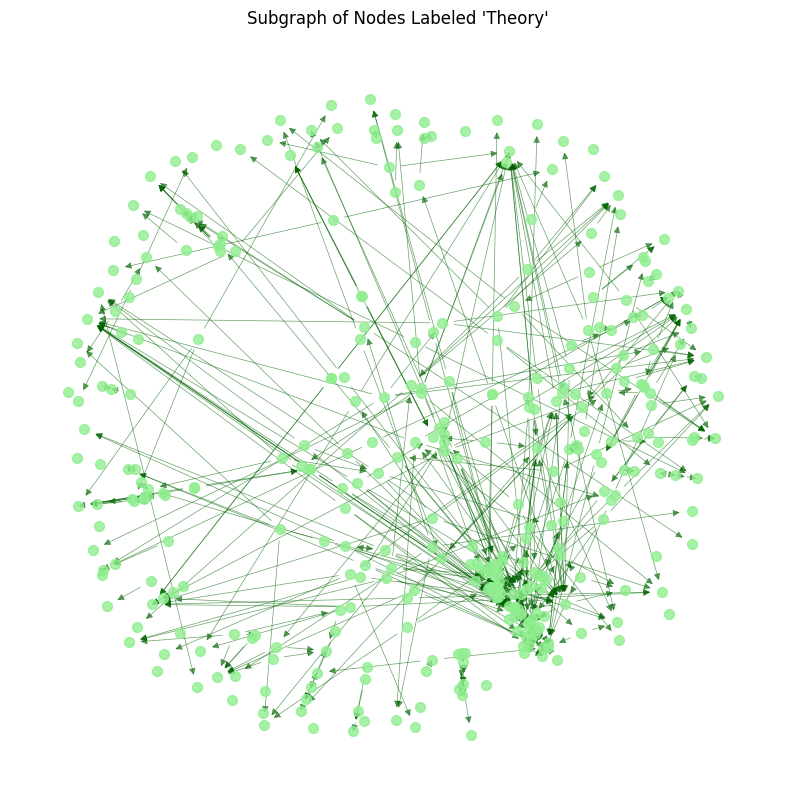

In [ ]:
# prompt: draw the graph of nodes that are labelled as theory

import matplotlib.pyplot as plt
# Find nodes labeled as 'Theory'
theory_nodes = [node for node, attributes in G.nodes(data=True) if attributes.get('label') == 'Theory']

# Create a subgraph containing only the 'Theory' nodes and the edges between them
# This is more meaningful than just isolated nodes
theory_subgraph = G.subgraph(theory_nodes)

# If the subgraph is empty (no 'Theory' nodes found), inform the user
if theory_subgraph.number_of_nodes() == 0:
    print("No nodes labeled 'Theory' found in the graph.")
else:
    # Use a layout algorithm to compute node positions for the subgraph
    # Using seed for reproducibility
    pos_theory = nx.spring_layout(theory_subgraph, seed=42)

    plt.figure(figsize=(10, 10))

    # Draw the nodes in the theory subgraph
    nx.draw_networkx_nodes(theory_subgraph, pos_theory, node_color='lightgreen', node_size=50, alpha=0.8)

    # Draw the edges within the theory subgraph
    nx.draw_networkx_edges(theory_subgraph, pos_theory, edge_color='darkgreen', width=0.5, alpha=0.6)

    # Draw node labels (optional, can be cluttered)
    # labels_theory = {node: node for node in theory_subgraph.nodes()}
    # nx.draw_networkx_labels(theory_subgraph, pos_theory, labels=labels_theory, font_size=8, font_color='black')

    plt.title("Subgraph of Nodes Labeled 'Theory'")
    plt.axis('off') # Hide axes
    plt.show()

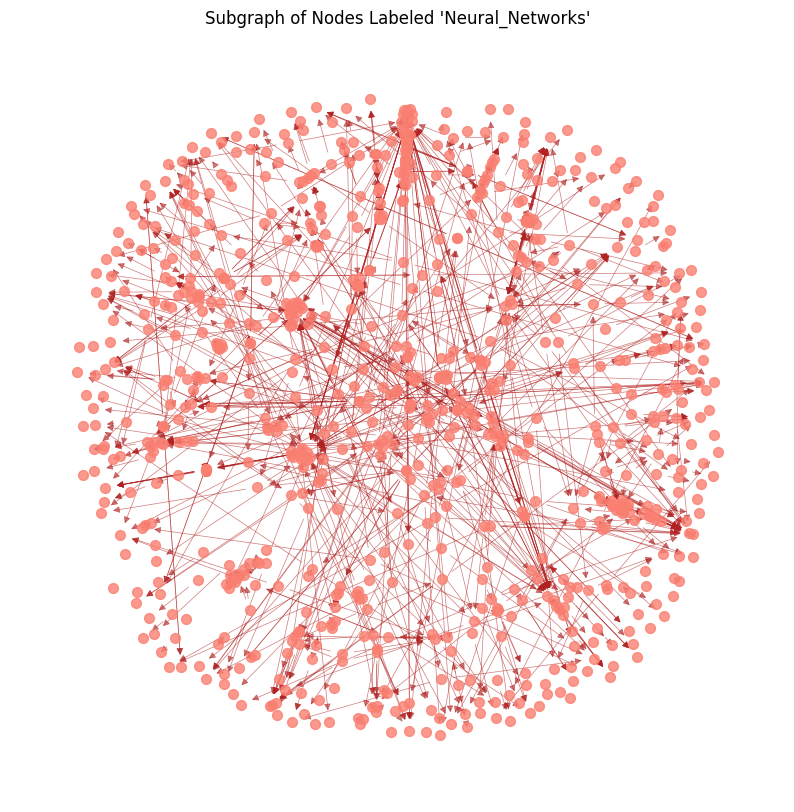

In [ ]:
# prompt: draw the graph of nodes that are labelled as Neural_networks

import matplotlib.pyplot as plt
# Find nodes labeled as 'Neural_Networks'
neural_networks_nodes = [node for node, attributes in G.nodes(data=True) if attributes.get('label') == 'Neural_Networks']

# Create a subgraph containing only the 'Neural_Networks' nodes and the edges between them
neural_networks_subgraph = G.subgraph(neural_networks_nodes)

# If the subgraph is empty (no 'Neural_Networks' nodes found), inform the user
if neural_networks_subgraph.number_of_nodes() == 0:
    print("No nodes labeled 'Neural_Networks' found in the graph.")
else:
    # Use a layout algorithm to compute node positions for the subgraph
    # Using seed for reproducibility
    pos_nn = nx.spring_layout(neural_networks_subgraph, seed=42)

    plt.figure(figsize=(10, 10))

    # Draw the nodes in the neural networks subgraph
    nx.draw_networkx_nodes(neural_networks_subgraph, pos_nn, node_color='salmon', node_size=50, alpha=0.8)

    # Draw the edges within the neural networks subgraph
    nx.draw_networkx_edges(neural_networks_subgraph, pos_nn, edge_color='firebrick', width=0.5, alpha=0.6)

    # Draw node labels (optional, can be cluttered)
    # labels_nn = {node: node for node in neural_networks_subgraph.nodes()}
    # nx.draw_networkx_labels(neural_networks_subgraph, pos_nn, labels=labels_nn, font_size=8, font_color='black')

    plt.title("Subgraph of Nodes Labeled 'Neural_Networks'")
    plt.axis('off') # Hide axes
    plt.show()